In [13]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler

문제 1

8-다중선형회귀 파일의 내용을 참고하여 선형회귀 모델을 다항회귀 모델로 구현하시오.

In [2]:
origin = read_excel("https://data.hossam.kr/F02/fish2.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [3]:
origin.isna().sum()

길이    0
높이    0
두께    0
무게    0
dtype: int64

In [4]:
origin.describe()

,길이,높이,두께,무게
count,56.000000,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536,382.239286
std,9.021668,2.878343,1.775006,347.617717
min,8.400000,2.110000,1.410000,5.900000
25%,21.825000,5.690000,3.520000,120.000000
50%,25.300000,6.920000,4.155000,207.500000
75%,36.625000,10.850000,6.450000,692.500000
max,44.000000,12.800000,8.140000,1100.000000


In [5]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

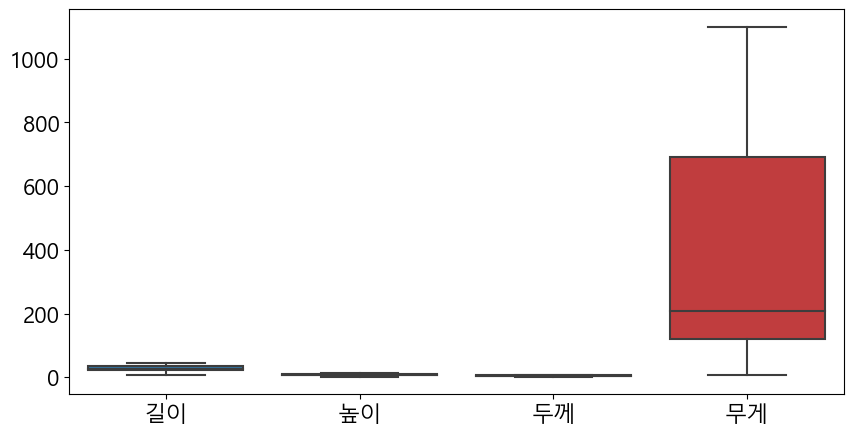

In [6]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

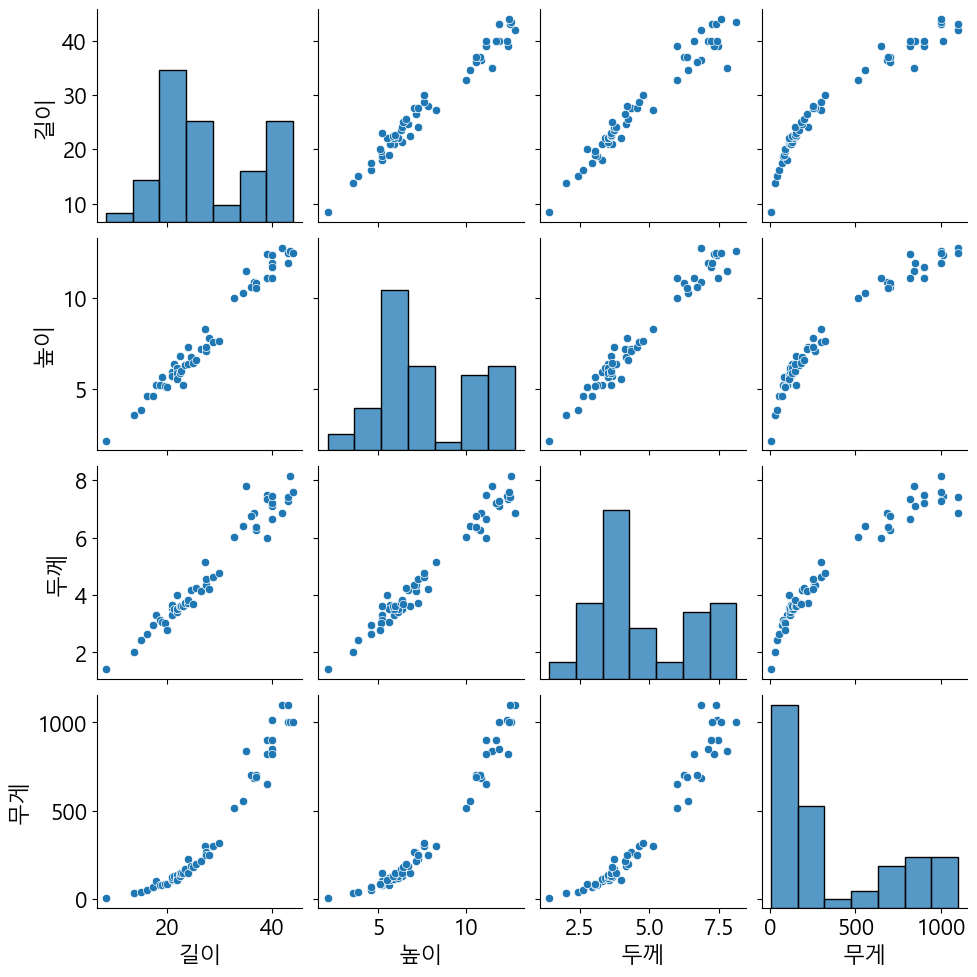

In [7]:
plt.figure(figsize=(30, 30))
sb.pairplot(origin)
plt.show()
plt.close()

In [8]:
np.random.seed(777)

In [10]:
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)

y_scaller = StandardScaler()
y_scale = y_scaller.fit_transform(y)

x_scale.shape, y_scale.shape

((56, 3), (56, 1))

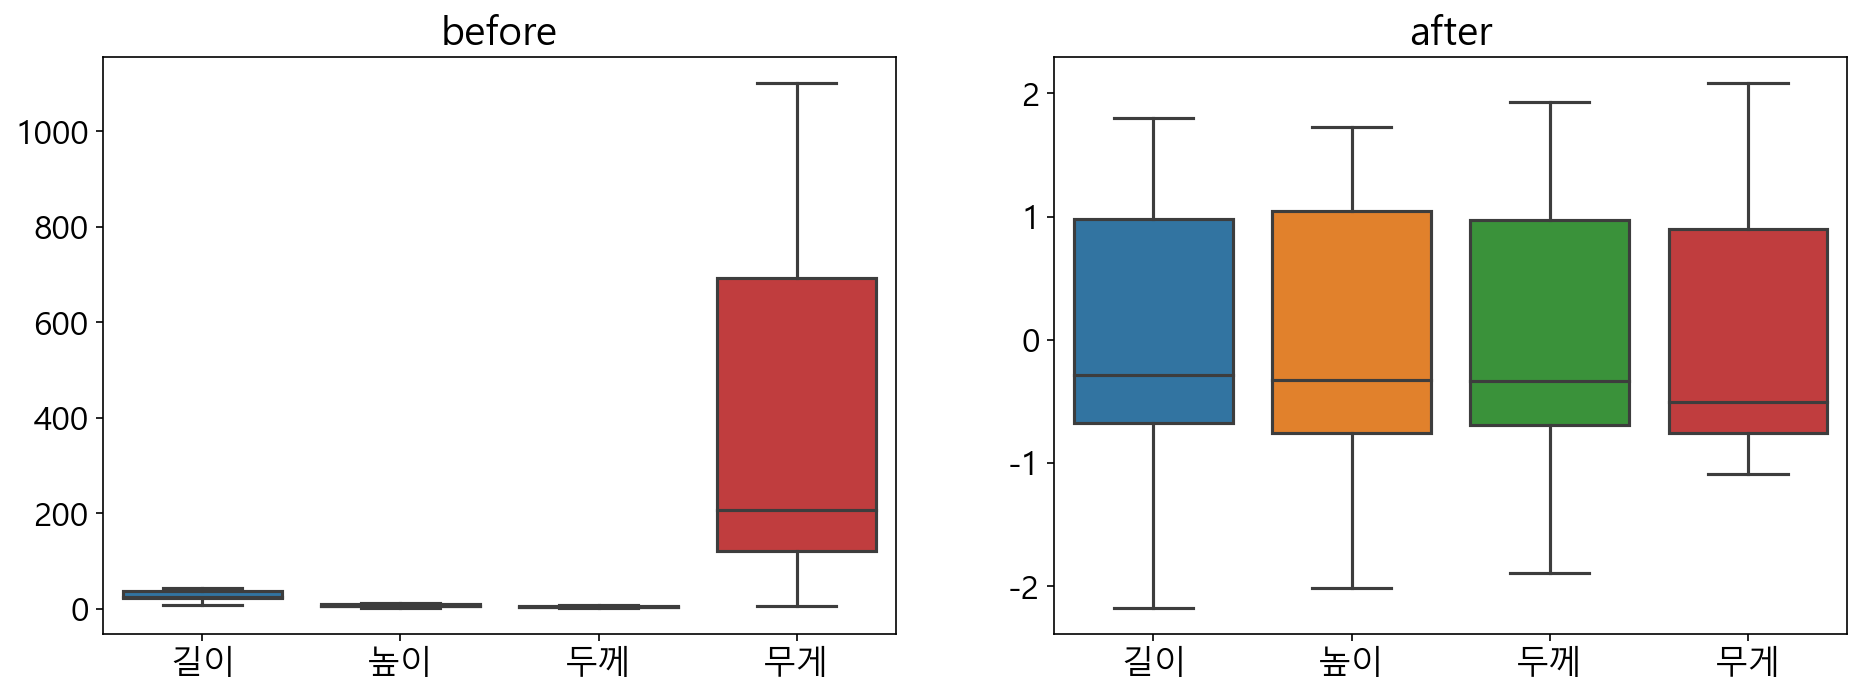

In [11]:
# 임시로 독립변수와 종속변수를 하나의 DataFrame으로 병합
x_scale_df = DataFrame(x_scale, columns=['길이','높이','두께'])
y_scale_df = DataFrame(y_scale, columns=['무게'])
tmp = merge(x_scale_df, y_scale_df, left_index=True, right_index=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
sb.boxplot(data=origin, ax=ax[0])
sb.boxplot(data=tmp, ax=ax[1])
ax[0].set_title('before')
ax[1].set_title('after')
plt.show()
plt.close()

In [21]:
x_scale_df.columns

Index(['길이', '높이', '두께'], dtype='object')

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(x_scale_df[['길이', '높이', '두께']])
poly.get_feature_names_out()
# x = DataFrame(fit, columns=poly.get_feature_names_out())
y = y_scale_df[['무게']]
y.head()
x_train, x_test, y_train, y_test = train_test_split(fit, y, test_size=0.3, shuffle=True, random_state=42)
x_train.shape, y_train.shape

((39, 9), (39, 1))

In [24]:
model = Sequential()

# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (len(x_train[0]), )))
model.add(Dense(32, activation = 'relu'))

# 하나의 값을 출력 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.001, verbose=1)
])

Epoch 1/500
2/2 [==============================] - 1s 153ms/step - loss: 3.0659 - mae: 1.2567 - val_loss: 1.5317 - val_mae: 0.8000 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 28ms/step - loss: 2.4786 - mae: 1.1383 - val_loss: 1.2702 - val_mae: 0.7427 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 29ms/step - loss: 2.1059 - mae: 1.0528 - val_loss: 1.0641 - val_mae: 0.6940 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 29ms/step - loss: 1.7919 - mae: 0.9744 - val_loss: 0.8947 - val_mae: 0.6475 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 30ms/step - loss: 1.5161 - mae: 0.9002 - val_loss: 0.7482 - val_mae: 0.5998 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 29ms/step - loss: 1.2665 - mae: 0.8220 - val_loss: 0.6141 - val_mae: 0.5500 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 30ms/step - loss: 1.0782 - mae: 0.7534 - val_loss: 0.4852 - val_mae: 0.4943 - lr: 0.001

In [26]:
# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,3.065866,1.256691,1.531734,0.799963,0.001
2,2.478630,1.138329,1.270153,0.742698,0.001
3,2.105856,1.052811,1.064112,0.693962,0.001
4,1.791917,0.974356,0.894652,0.647529,0.001
5,1.516103,0.900234,0.748154,0.599771,0.001
6,1.266542,0.821989,0.614105,0.550037,0.001
7,1.078197,0.753394,0.485222,0.494323,0.001
8,0.883442,0.677956,0.373461,0.436547,0.001
9,0.701715,0.600493,0.278322,0.380848,0.001


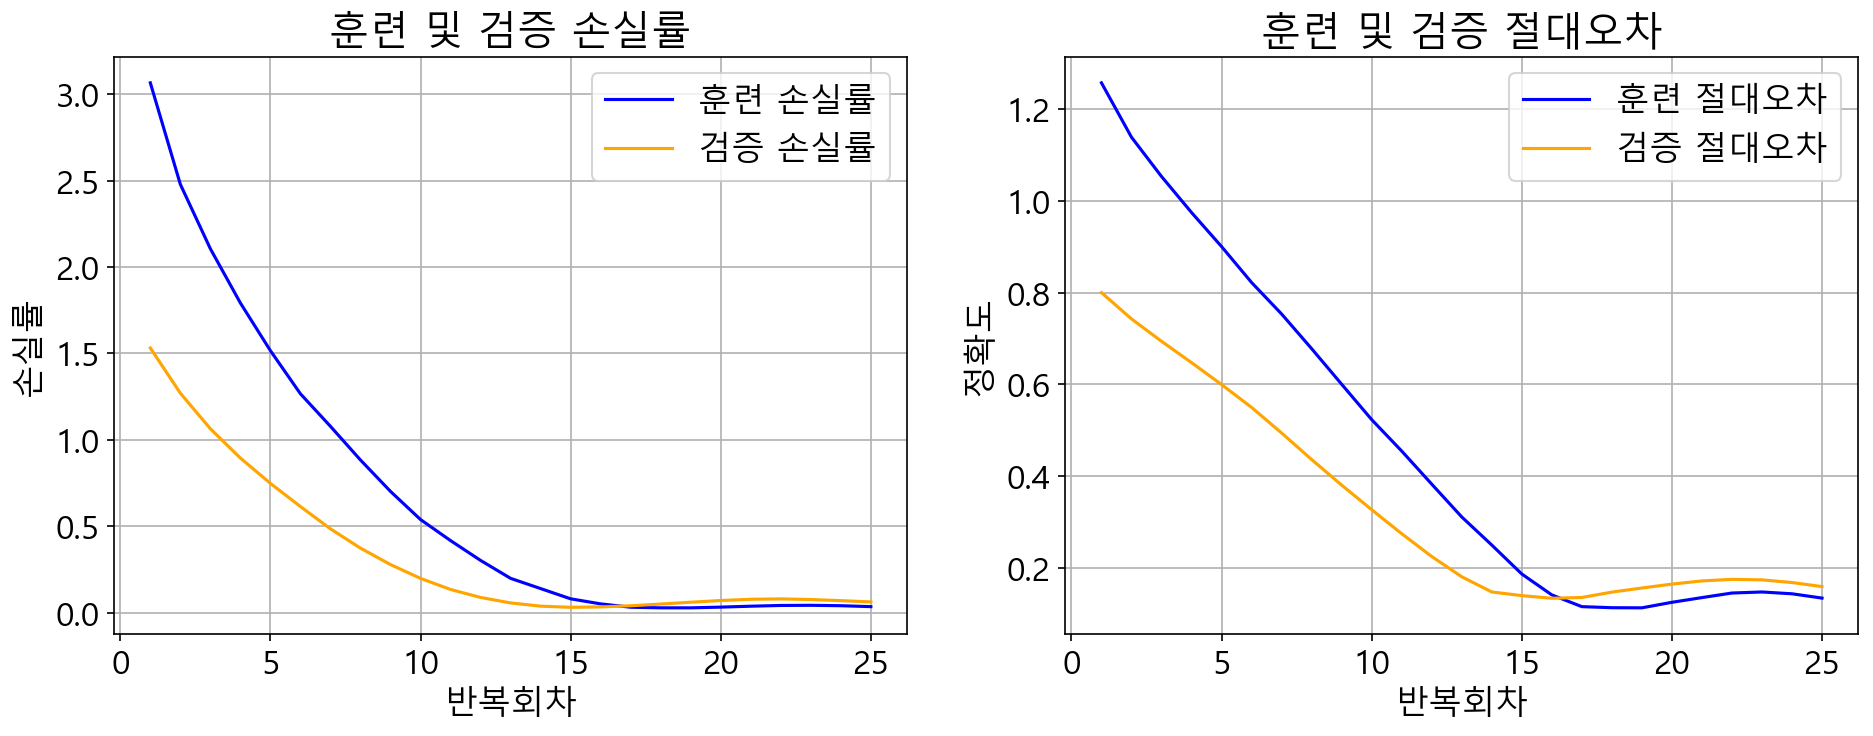

In [27]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [28]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 3ms/step - loss: 0.0311 - mae: 0.1250
최종 훈련 손실률: 0.031075, 최종 훈련 절대오차: 0.125001
1/1 [==============================] - 0s 22ms/step - loss: 0.0623 - mae: 0.1599
최종 검증 손실률: 0.062313, 최종 검증 절대오차: 0.159914


In [29]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

1/1 [==============================] - 0s 19ms/step


In [34]:
import pandas as pd

x = pd.DataFrame(x_train)
x.columns

RangeIndex(start=0, stop=9, step=1)

In [37]:
train_df = DataFrame(x_train, columns=['0','1','2','3','4','5','6','7','8'])
train_df['무게(관측치)'] = y_train
train_df['무게(예측치)'] = train_pred

train_df['훈련오차'] = train_df['무게(관측치)']-train_df['무게(예측치)']

train_df.head()

,0,1,2,3,4,5,6,7,8,무게(관측치),무게(예측치),훈련오차
0,-1.173599,-1.147103,-1.026405,1.377334,1.346238,1.204588,1.315845,1.177393,1.053508,NaN,-1.049881,NaN
1,0.906763,0.963306,1.133807,0.822219,0.873490,1.028094,0.927959,1.092203,1.285518,-1.016660,1.046887,-2.063547
2,-0.323559,-0.498555,-0.605732,0.104690,0.161312,0.195990,0.248557,0.301991,0.366912,-0.993438,-0.682237,-0.311200
3,1.354152,1.426054,1.344143,1.833728,1.931094,1.820175,2.033629,1.916820,1.806721,NaN,1.631975,NaN
4,1.242305,1.601337,1.480578,1.543321,1.989348,1.839329,2.564279,2.370903,2.192110,-0.906355,1.782567,-2.688922
